# Домашняя работа №2

In [1]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

import scipy.stats as sts
import numpy as np
from matplotlib import pyplot as plt

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

In [ ]:
Выборка - случайно выбранная часть элементов генеральной совокупности

- Если размер выборки больше 200, то такая выборка является репрезентативной?

In [ ]:
Зависит от объема генеральной совокупности и требуемого доверительного интервала

- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

In [ ]:
1) каждый волос каждого футболиста
2) каждый волос на голове каждого футболиста
3) оценка средней длины волос на голове каждого футболиста

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

In [ ]:
1) Случайная выборка обьемом n из генеральной совокупности
2) 10 случайных выборок по каждому году рождения объемом n/10

## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.


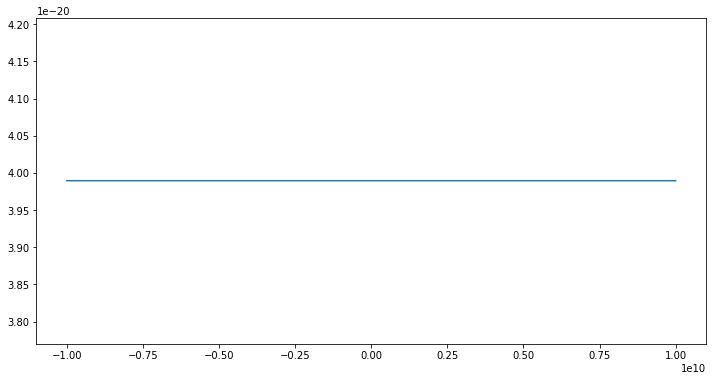

In [5]:
x = np.linspace(-10000000000, 10000000000, 10000)

plt.figure(figsize=(12,6))

pdf = flat_dstr.pdf(x)
plt.plot(x, pdf)



- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

In [6]:
gamma_rv = stats.gamma(3, 1)
sample = gamma_rv.rvs(51)
med = sorted(sample)[25]
mean = sample.mean()

#your code here
overshoot = 999
np.put(sample,50,overshoot)
new_med = sorted(sample)[25]
new_mean = sample.mean()


print(med,mean)
print(new_med,new_mean)
#медиана не изменится/изменится незначительно. 
#среднее значение изменится тем сильнее, чем дальше будет вброс от среднего


3.4878301753586562 4.184974218039341
3.8622714450142923 23.705590030059028


- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

In [11]:
pois_rv = stats.poisson(2)
sample = pois_rv.rvs(100)
C = 0.5
#your code here
clean_mean = sample.mean()

mean_with_c = np.sum([sample[i] + C for i in range (0,100)])/100

mean_mult_c = np.sum([sample[i] * C for i in range (0,100)])/100


#При добавлении к каждому элементу констатны среднее изменится на величину константы

#При умножении каждого элемента на константу среднее изменится в равное константе количество раз

print('среднее выборки =',clean_mean)
print('среднее выборки где каждый элемент+0,5 =',mean_with_c,'равен 0.5+среднее выборки =',clean_mean + C)
print('среднее выборки где каждый элемент*0,5 =',mean_mult_c,'равен 0.5*среднее выборки =',clean_mean * C)      


среднее выборки = 2.22
среднее выборки где каждый элемент+0,5 = 2.72 равен 0.5+среднее выборки = 2.72
среднее выборки где каждый элемент*0,5 = 1.11 равен 0.5*среднее выборки = 1.11


- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

In [36]:
exp_rv = stats.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()

#your code here
overshoot = 52
np.put(sample,49,overshoot)
new_var = sample.var()

print('Дисперсия распределения без вброса =',var)
print('Дисперсия распределения с одним вбросом =', new_var)
print('После добавления вброса десперсия увеличилась в', round(new_var/var,2),'раза')

Дисперсия распределения без вброса = 0.88058425019203
Дисперсия распределения с одним вбросом = 44.02212595232193
После добавления вброса десперсия увеличилась в 49.99 раза


- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s^2, \bar{X}+s^2)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

In [45]:
norm_rv = stats.norm(3,1)
sample = norm_rv.rvs(1000)
#your code here
import math
mean_simple = sum(sample)/1000
iq_range = sorted(sample)[(1000//4)*3] - sorted(sample)[1000//4]
var_range = 2*(1 / (1000 - 1) * np.sum([(sample[i] - mean_simple)**2 for i in range(1000)]))
print('размах между 25 и 75 перcентилем =', round(iq_range,2),'меньше размаха отклонения от среднего на величину дисперсии =', round(var_range,3))

размах между 25 и 75 квантилем = 1.39 меньше размаха отклонения от среднего на величину дисперсии = 2.099


## Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

In [47]:
beta_rv = stats.beta(1,3)
#your code here
sample_beta = beta_rv.rvs(100)
mean = sample_beta.mean()
print ('например, выборочное среднее =',mean)
#статистика - измеримая числовая функция от выборки

например среднее выборки = 0.24690234625695712


- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

In [55]:
gamma_rv = stats.gamma(2,2)
sample_gamma = gamma_rv.rvs(100)
#your code here
mean = sample_gamma.mean() #матожидание
var = sample_gamma.var()   #дисперсия
med = np.median(sample_gamma)   #медиана

print('выборочное среднее', mean)
print('выборочная дисперсия', var)
print('медиана, или 50-й перcентиль', med)

выборочное среднее 3.8509655257870623
выборочная дисперсия 2.052451683273658
медиана, или 50-й перcентиль 3.3822832302193504


- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

Text(0.5, 0, '$x avg$')

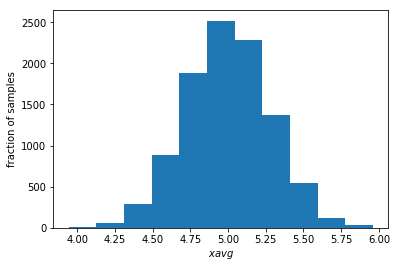

In [60]:
# по ЦПТ Выборочное среднее будет стремтиться к среднему распределения т.е. к 5
# чем больше объем выборки, тем точнее оценка выборочного среднего

#your code here
norm_rv = sts.norm(5,2)

mean_array=[]
for i in range(10000):
    sample = norm_rv.rvs(50)
    mean_array.append(sample.mean())

plt.hist(mean_array, 11)
plt.ylabel('fraction of samples')
plt.xlabel('$x avg$')



- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

Text(0.5, 0, '$x avg$')

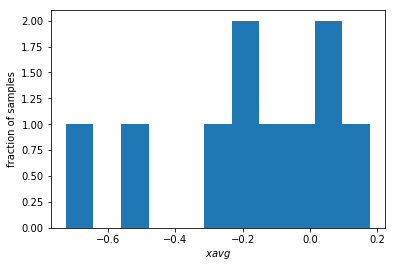

In [125]:
#your code here

mean_array=[]
for i in range(10):
    sample = norm_rv.rvs(50)
    mean_array.append(sample.mean())


plt.hist(mean_array, 11)
plt.ylabel('fraction of samples')
plt.xlabel('$x avg$')


- Сделайте z-преобразование для данного распределения

In [126]:
expon_rv = stats.expon(3)
sample = expon_rv.rvs(10000)
sample_z = []
new_z = 0
mean_z = 0
for i in range (10000):
    new_z = (sample[i]-sample.mean())/sample.var()
    sample_z.append(new_z)
    mean_z +=new_z

print(mean_z/10000)

-2.6141311337823936e-16


## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

In [2]:
#your code here
chisqr_rv = sts.chi2(10)
chisqr_rv.ppf(0.9)

15.987179172105263

- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

In [76]:
#your code here
stud_rv=sts.t(15)
print(round(stud_rv.ppf(0.95)*2,2),'<',round(stud_rv.ppf(0.975)*2,2))
print('90% интервал уже, чем 95% интервал')

3.51 < 4.26
90% интервал уже, чем 95% интервал


- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

In [124]:
norm_rv = sts.norm(0, 2)
#your code here
small_sample = norm_rv.rvs(50000)
large_sample = norm_rv.rvs(100000)

var_s = small_sample.var() 
var_l = large_sample.var() 

var_rel_sum = 0
i = 0
while i <= 100:
    var_rel_sum += var_s/var_l
    i += 1
print (round(var_rel_sum/100,5),'вероятно, больше 1, а следовательно более широкое распределение чаще обладает меньшей дисперсией')

1.01063 вероятно, больше 1, а следовательно более широкое распределение чаще обладает меньшей дисперсией


- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?

In [ ]:
#your answer here
Ошибка второго рода

#### Какие рассуждения относительно p-value верные?

- Елси p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем сильнее получаемые различия.


In [ ]:
#your answer here
1) не верно
2) не верно
3) не верно

- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99\% доверительный интервал хорошей оценкой в общем случае?

In [ ]:
#your answer here
для отклонения предпочтительнее 0.01
99% ДИ - хорошая оценка, но вероятно, с практической точки зрения интервал получится излишне широким.


## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

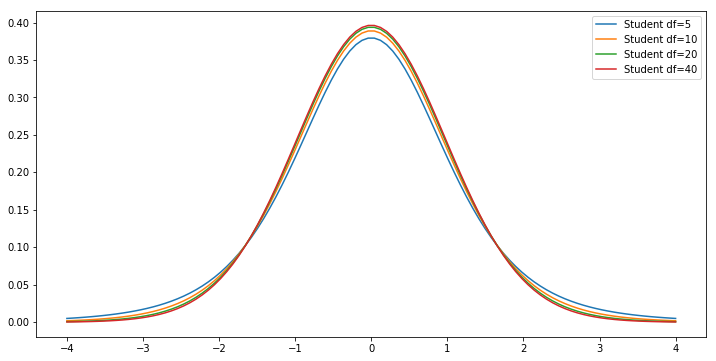

In [31]:
#your code here

t_rv5 = sts.t(5)
t_rv10 = sts.t(10)
t_rv20 = sts.t(20)
t_rv40 = sts.t(40)
x = np.linspace(-4, 4, 100)

plt.figure(figsize=(12,6))

pdf = t_rv5.pdf(x)
plt.plot(x, pdf)
pdf_2 = t_rv10.pdf(x)
plt.plot(x, pdf_2)
pdf_3 = t_rv20.pdf(x)
plt.plot(x, pdf_3)
pdf_4 = t_rv40.pdf(x)
plt.plot(x, pdf_4)

plt.legend(['Student df=5', 'Student df=10', 'Student df=20', 'Student df=40'])

# Распределения Стьюдента с большим числом степеней свобод обладают большей кучностью относительно центра распределения

- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

<seaborn.axisgrid.PairGrid object at 0x7ff278fa03c8>      a    b
a  1.0 -1.0
b -1.0  1.0


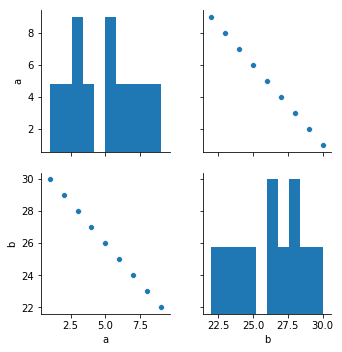

In [6]:
#your code here
a =[1,2,3,4,5,6,7,8,9,5,3]
b =[30,29,28,27,26,25,24,23,22,26,28] 

data = pd.DataFrame()
data['a'] = a
data['b'] = b

print(sns.pairplot(data), data.corr())


- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

<seaborn.axisgrid.PairGrid object at 0x7ff278896710>      a    b
a  1.0  0.0
b  0.0  1.0


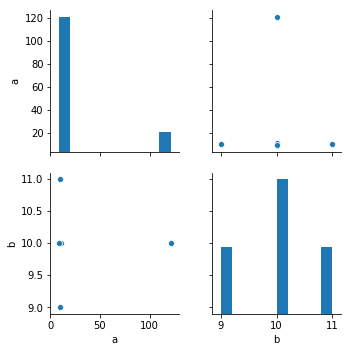

In [16]:
#your code here
a =[11,10,9,10,121,10,9,10,]
b =[10,11,10,9,10,11,10,9,] 

data = pd.DataFrame()
data['a'] = a
data['b'] = b

print(sns.pairplot(data), data.corr())


- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [29]:
norm_rv = stats.norm(4,2)
sample_1 = norm_rv.rvs(100)
sample_2 = norm_rv.rvs(100)
sample = np.concatenate((sample_1, sample_2))

sample_ord = sorted(sample)
sample_1_r = 0
sample_2_r = 0
for i in range (0,len(sample_ord)):
    if sample_ord[i] in sample_1:
        sample_1_r += i
    else: 
        sample_2_r += i
print('Ранг выборки 1 =', sample_1_r, 'Ранг выборки 2 =',sample_2_r, 'Сумма рангов =', sample_1_r+sample_2_r )

Ранг выборки 1 = 9706 Ранг выборки 2 = 10194 Сумма рангов = 19900
